<a href="https://colab.research.google.com/github/whyrzky/DS-Portfolio-Projects/blob/main/Basic%20Python%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Membuat Data Frame Customer

Data frame terdiri dari kolom:

1.   Nama
2.   Tempat Lahir
3. Tanggal lahir
4. Tanggal terakhir berbelanja
5. Rata-rata amount belanja per bulan (Rp)
6. Total transaksi per bulan


In [ ]:
import pandas as pd

#membuat dictionary
nama = ['Abdul', 'Ghani', 'Saipul', 'Zaenal', 'Indra']
tempat_lahir = ['JKT', 'BDG', 'BGR', 'SBY', 'YGY']
tanggal_lahir = ['22/06/1998','25/01/1993','23/12/1999','30/10/2000','28/02/1996']
tanggal_terakhir_belanja = ['21/02/2022','22/02/2022','23/02/2022','24/02/2022','26/02/2022']
rerata_amount_per_bulan = [100000,50000,200000,300000,20000]
total_trx_per_bulan = [5,2,8,6,2]

#membuat dataframe
data_customer = {'nama':nama,
                 'tempat lahir':tempat_lahir,
                 'tanggal lahir':tanggal_lahir,
                 'tanggal terakhir belanja':tanggal_terakhir_belanja,
                 'amount per bulan (Rp)':rerata_amount_per_bulan,
                 'total trx per bulan':total_trx_per_bulan}
                 
#membuat variable
df_customer = pd.DataFrame(data_customer)
df_customer

,nama,tempat lahir,tanggal lahir,tanggal terakhir belanja,amount per bulan (Rp),total trx per bulan
0,Abdul,JKT,22/06/1998,21/02/2022,100000,5
1,Ghani,BDG,25/01/1993,22/02/2022,50000,2
2,Saipul,BGR,23/12/1999,23/02/2022,200000,8
3,Zaenal,SBY,30/10/2000,24/02/2022,300000,6
4,Indra,YGY,28/02/1996,26/02/2022,20000,2


Pilih user yang paling loyal berbelanja. Dimana user loyal adalah user yang memiliki rata-rata amount belanja per bulan di atas 100 ribu rupiah dan total transaksi per bulan di atas 5.

In [ ]:
#membuat filter
amount_user_loyal = df_customer['amount per bulan (Rp)'] >= 100000 
trx_user_loyal = df_customer['total trx per bulan'] >= 5

#membuat output
user_loyal = df_customer[amount_user_loyal & trx_user_loyal]
user_loyal

,nama,tempat lahir,tanggal lahir,tanggal terakhir belanja,amount per bulan (Rp),total trx per bulan
0,Abdul,JKT,22/06/1998,21/02/2022,100000,5
2,Saipul,BGR,23/12/1999,23/02/2022,200000,8
3,Zaenal,SBY,30/10/2000,24/02/2022,300000,6


# Section 2: Analysis Business Dataset From Kaggle

Pilih salah satu data yang ada di kaggle (sebisa mungkin yang berhubungan dengan bisnis). Kemudian analisa data tersebut dan upload pekerjaannya di githubmu.

Tools : 
Gunakan google collaboratory untuk mengerjakan tugas-tugas yang diberikan. Untuk soal advanced gunakan github dan kaggle agar membantu pekerjaan anda.

In [ ]:
#Data Tentang Price Coffee in 45 years (1977-2022)
#https://www.kaggle.com/datasets/williamriveraramos/coffee-prices-historical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('coffee-prices-historical-chart-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12168 entries, 0 to 12167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    12168 non-null  object 
 1   value   12147 non-null  float64
dtypes: float64(1), object(1)
memory usage: 190.2+ KB


1. Cleaning Data

In [ ]:
#Analisis Deskriptif
df.describe()

,value
count,12147.000000
mean,1.267276
std,0.478930
min,0.425000
25%,0.948500
50%,1.237000
75%,1.470000
max,3.356300


In [ ]:
#Check the NaN Values
nan_value = df.isnull().sum()
nan_value

date      0
value    21
dtype: int64

In [ ]:
#Fill the NaN Values with Mean of 'Value'

df_mean = df['value'].mean()
df['value'].fillna(value=df_mean, inplace=True)
nan2_value = df.isnull().sum()
nan2_value

date     0
value    0
dtype: int64

2. Merapihkan Data

In [ ]:
#Replace 'value' to 'price'
df.rename(columns={'value':'price'}, inplace=True)
df.columns

Index(['date', 'price'], dtype='object')

In [ ]:
#Replace 'date' into datetime type data
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date'].dtype

dtype('<M8[ns]')

3. Analisis Data

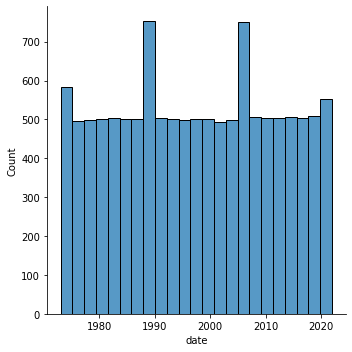

In [ ]:
#Get and plot only the year from column 'date'
get_year = df.date.dt.year
sns.displot(get_year)

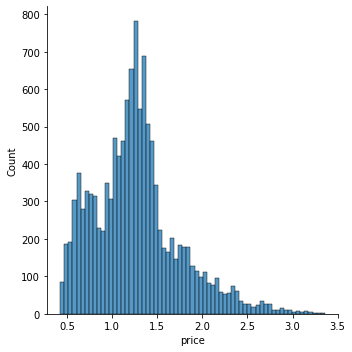

In [ ]:
#Get and plot price from column 'price'
get_price = df.price
sns.displot(get_price)

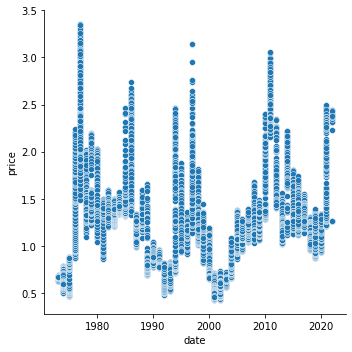

In [ ]:
#Plot Years and Price
sns.relplot(x=get_year, y=get_price)

It can be concluded that in the 1977 there was the highest increase in coffee price commodities for 44 years, due the increasing of speculative demand from the US and the supplies are insufficient to meet them. Then the high coffee prices following in the 1985, 1997, 2011, and 2021.